In [42]:
import json
import pandas as pd
import datetime
import numpy as np
import calendar

with open('../Data/readtracker.json', 'r') as fp:
    d = json.load(fp)


In [30]:

def get_sessions(d):
    sessions = pd.DataFrame(columns=['title', 'date', 'timespent', 'finished'])
    i = 0

    for book in d["books"]:
        title = book["title"]
        finished = None
        if book["state"] == "Finished":
            finished = datetime.datetime.fromtimestamp(book["current_position_timestamp"]/1000)
        for session in book["sessions"]:
            i+=1
            date = datetime.datetime.fromtimestamp(session["timestamp"]/1000)
            timespent = session["duration_seconds"] / 3600
            sessions.loc[i] = [title, date, timespent , finished]
    sessions.set_index("date", drop=False)
    return sessions

In [31]:
def books_for_year(year, sessions):
    sessionsForYear = sessions[(sessions['date'] > np.datetime64(datetime.datetime(year, 1, 1))) & (sessions['date'] < np.datetime64(datetime.datetime(year, 12, 31)))].groupby(['title']).sum()
    totalTime = sessionsForYear['timespent'].sum()
    return sessionsForYear, totalTime

def sessions_for_year(year, sessions):
    sessionsForYear = sessions[(sessions['date'] > np.datetime64(datetime.datetime(year, 1, 1))) & (sessions['date'] < np.datetime64(datetime.datetime(year, 12, 31)))]
    totalTime = sessionsForYear['timespent'].sum()
    return sessionsForYear, totalTime

def targetForDate(date, goalforyear):
    doy = date.timetuple().tm_yday
    total = 364 if calendar.isleap(2020) else 365
    pct = doy / total
    return pct * goalforyear

In [40]:
sessions = get_sessions(d)
#print(books_for_year(2021, sessions))
print(sessions_for_year(2021, sessions))
print(targetForDate(datetime.datetime.today(), 365))

(                                                 title  \
210                                            Kennedy   
211                                            Kennedy   
212                                            Kennedy   
213                                            Kennedy   
214                                            Kennedy   
215                                            Kennedy   
229  The Science of Trust: Emotional Attunement for...   
231                                         Polysecure   
232                                         Polysecure   
233                                         Polysecure   
234                                         Polysecure   
235                                         Polysecure   
236                                   The Last Lecture   
237                                   The Last Lecture   
238                           Ethics in the Real World   
239                           Ethics in the Real World   

            

<AxesSubplot:xlabel='date'>

<Figure size 432x288 with 0 Axes>

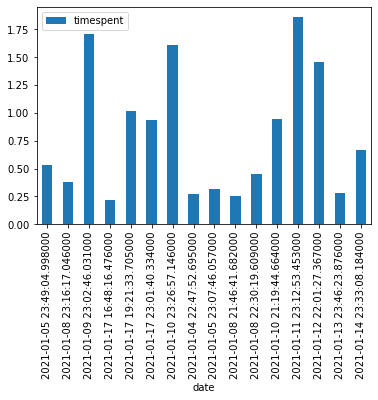

In [38]:
import matplotlib.pyplot as plt
plt.figure()
sessions2021, _ = sessions_for_year(2021, sessions)
sessions2021.plot.bar(x="date", y="timespent")